# The purpose is to show the bpgs

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[1])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [13]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [14]:
obj_names = []
index=0
for hdr in obj_headers: 
        obj_name=obj_headers[index]['TARGETID']
        obj_names.append(obj_name)
        index+=1

In [15]:
filelist[:5]

['bpgs_87.fits',
 'bpgs_68.fits',
 'bpgs_169.fits',
 'bpgs_29.fits',
 'bpgs_91.fits']

In [26]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^bpgs_([0-9].*).fits$',thefile)
    if(len(thenames)>0):
        obj_names2.append('bpgs_'+thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [27]:
print obj_names2

['bpgs_87', 'bpgs_68', 'bpgs_169', 'bpgs_29', 'bpgs_91', 'bpgs_128', 'bpgs_153', 'bpgs_104', 'bpgs_52', 'bpgs_44', 'bpgs_112', 'bpgs_145', 'bpgs_13', 'bpgs_64', 'bpgs_132', 'bpgs_165', 'bpgs_33', 'bpgs_25', 'bpgs_173', 'bpgs_124', 'bpgs_72', 'bpgs_108', 'bpgs_48', 'bpgs_149', 'bpgs_148', 'bpgs_49', 'bpgs_109', 'bpgs_125', 'bpgs_73', 'bpgs_24', 'bpgs_172', 'bpgs_164', 'bpgs_32', 'bpgs_65', 'bpgs_133', 'bpgs_144', 'bpgs_12', 'bpgs_45', 'bpgs_113', 'bpgs_105', 'bpgs_53', 'bpgs_1', 'bpgs_152', 'bpgs_90', 'bpgs_129', 'bpgs_28', 'bpgs_168', 'bpgs_86', 'bpgs_69', 'bpgs_62', 'bpgs_134', 'bpgs_163', 'bpgs_35', 'bpgs_23', 'bpgs_175', 'bpgs_122', 'bpgs_74', 'bpgs_159', 'bpgs_58', 'bpgs_118', 'bpgs_19', 'bpgs_81', 'bpgs_138', 'bpgs_39', 'bpgs_97', 'bpgs_78', 'bpgs_155', 'bpgs_6', 'bpgs_102', 'bpgs_54', 'bpgs_42', 'bpgs_114', 'bpgs_143', 'bpgs_15', 'bpgs_142', 'bpgs_14', 'bpgs_43', 'bpgs_115', 'bpgs_103', 'bpgs_55', 'bpgs_7', 'bpgs_154', 'bpgs_96', 'bpgs_79', 'bpgs_38', 'bpgs_80', 'bpgs_139', 'bpgs

In [28]:
obj_names=obj_names2

In [29]:
print obj_files

['bpgs_87.fits', 'bpgs_68.fits', 'bpgs_169.fits', 'bpgs_29.fits', 'bpgs_91.fits', 'bpgs_128.fits', 'bpgs_153.fits', 'bpgs_104.fits', 'bpgs_52.fits', 'bpgs_44.fits', 'bpgs_112.fits', 'bpgs_145.fits', 'bpgs_13.fits', 'bpgs_64.fits', 'bpgs_132.fits', 'bpgs_165.fits', 'bpgs_33.fits', 'bpgs_25.fits', 'bpgs_173.fits', 'bpgs_124.fits', 'bpgs_72.fits', 'bpgs_108.fits', 'bpgs_48.fits', 'bpgs_149.fits', 'bpgs_148.fits', 'bpgs_49.fits', 'bpgs_109.fits', 'bpgs_125.fits', 'bpgs_73.fits', 'bpgs_24.fits', 'bpgs_172.fits', 'bpgs_164.fits', 'bpgs_32.fits', 'bpgs_65.fits', 'bpgs_133.fits', 'bpgs_144.fits', 'bpgs_12.fits', 'bpgs_45.fits', 'bpgs_113.fits', 'bpgs_105.fits', 'bpgs_53.fits', 'bpgs_1.fits', 'bpgs_152.fits', 'bpgs_90.fits', 'bpgs_129.fits', 'bpgs_28.fits', 'bpgs_168.fits', 'bpgs_86.fits', 'bpgs_69.fits', 'bpgs_62.fits', 'bpgs_134.fits', 'bpgs_163.fits', 'bpgs_35.fits', 'bpgs_23.fits', 'bpgs_175.fits', 'bpgs_122.fits', 'bpgs_74.fits', 'bpgs_159.fits', 'bpgs_58.fits', 'bpgs_118.fits', 'bpgs_19.f

In [30]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [31]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

bpgs_87 : 
bpgs_87.fits
bpgs_68 : 
bpgs_68.fits
bpgs_169 : 
bpgs_169.fits
bpgs_29 : 
bpgs_29.fits
bpgs_91 : 
bpgs_91.fits
bpgs_128 : 
bpgs_128.fits
bpgs_153 : 
bpgs_153.fits
bpgs_104 : 
bpgs_104.fits
bpgs_52 : 
bpgs_52.fits
bpgs_44 : 
bpgs_44.fits
bpgs_112 : 
bpgs_112.fits
bpgs_145 : 
bpgs_145.fits
bpgs_13 : 
bpgs_13.fits
bpgs_64 : 
bpgs_64.fits
bpgs_132 : 
bpgs_132.fits
bpgs_165 : 
bpgs_165.fits
bpgs_33 : 
bpgs_33.fits
bpgs_25 : 
bpgs_25.fits
bpgs_173 : 
bpgs_173.fits
bpgs_124 : 
bpgs_124.fits
bpgs_72 : 
bpgs_72.fits
bpgs_108 : 
bpgs_108.fits
bpgs_48 : 
bpgs_48.fits
bpgs_149 : 
bpgs_149.fits
bpgs_148 : 
bpgs_148.fits
bpgs_49 : 
bpgs_49.fits
bpgs_109 : 
bpgs_109.fits
bpgs_125 : 
bpgs_125.fits
bpgs_73 : 
bpgs_73.fits
bpgs_24 : 
bpgs_24.fits
bpgs_172 : 
bpgs_172.fits
bpgs_164 : 
bpgs_164.fits
bpgs_32 : 
bpgs_32.fits
bpgs_65 : 
bpgs_65.fits
bpgs_133 : 
bpgs_133.fits
bpgs_144 : 
bpgs_144.fits
bpgs_12 : 
bpgs_12.fits
bpgs_45 : 
bpgs_45.fits
bpgs_113 : 
bpgs_113.fits
bpgs_105 : 
bpgs_105.fit

## Plot the SED

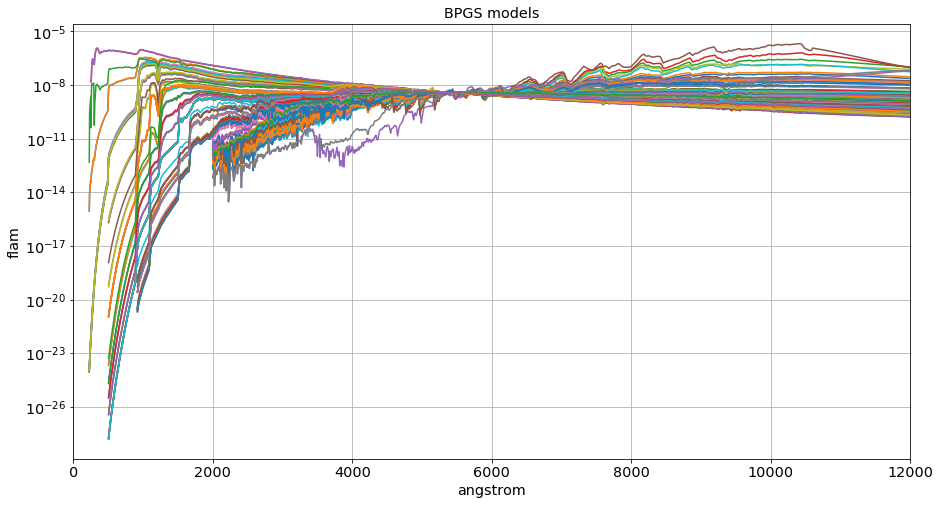

In [32]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("BPGS models")
    plt.savefig("bpgs.png")